In [2]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=";")

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
# check the shape of the dataframe

print("there are",df.shape[0], " rows and" , df.shape[1] , "columns in the dataframe . ")

there are 4898  rows and 12 columns in the dataframe . 


In [5]:
# check the size of the dataframe

print("Total entries in the datafrme is " ,df.size)

Total entries in the datafrme is  58776


In [6]:
## check the summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


- here we have the 12 columns
- first 11 columns are the chemical characteristics of the wine and it is in the float64 datatype .
- The last columns represent the quality of the wine , which is in between 3 to the 6 and it is in the int 64 datatype.   

In [7]:
# chenge the columns name replce the spaces with the underscore

df.columns = df.columns.str.replace(' ', '_')

df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
for col in df.columns:
    print(df[col].value_counts())

fixed_acidity
6.80     308
6.60     290
6.40     280
6.90     241
6.70     236
        ... 
14.20      1
4.50       1
6.45       1
3.80       1
3.90       1
Name: count, Length: 68, dtype: int64
volatile_acidity
0.280    263
0.240    253
0.260    240
0.250    231
0.220    229
        ... 
1.100      1
0.090      1
0.785      1
0.405      1
0.355      1
Name: count, Length: 125, dtype: int64
citric_acid
0.30    307
0.28    282
0.32    257
0.34    225
0.29    223
       ... 
1.66      1
0.99      1
1.23      1
0.86      1
0.11      1
Name: count, Length: 87, dtype: int64
residual_sugar
1.20     187
1.40     184
1.60     165
1.30     147
1.10     146
        ... 
2.65       1
2.35       1
4.35       1
8.55       1
18.40      1
Name: count, Length: 310, dtype: int64
chlorides
0.044    201
0.036    200
0.042    184
0.040    182
0.046    181
        ... 
0.209      1
0.271      1
0.120      1
0.212      1
0.136      1
Name: count, Length: 160, dtype: int64
free_sulfur_dioxide
29.0     160
31

- here we can see in the column quality the

- quality ----number of records
- 6 ----------2198
- 5 ----------1457
- 7 ----------880
- 8 ----------175
- 4 ----------163
- 3 ----------20
- 9 ----------5

- the data is imbalanced

In [9]:
# now check for the null values in the dataframe

df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- there is no any null values in the dataframe.

In [10]:
# now check for the duplicates

df.duplicated().sum()

np.int64(937)

- There are 937 duplicated rows in the dataframe .
- we have to clear the duplicated data from the dataframe.

In [11]:
# drop the duplicate data

df=df.drop_duplicates()

# now check the duplicate rows

df.duplicated().sum()

np.int64(0)

- The dupplicated rows are cleared.

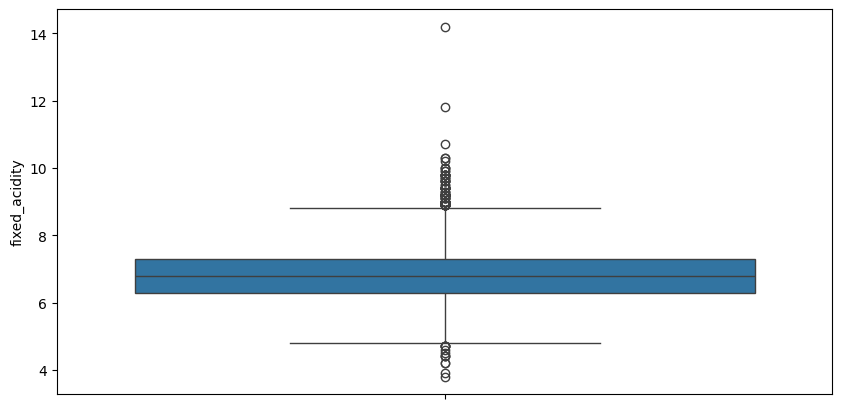

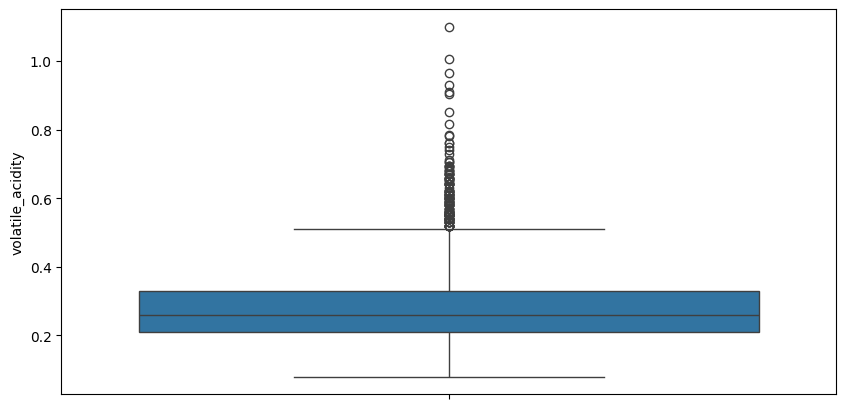

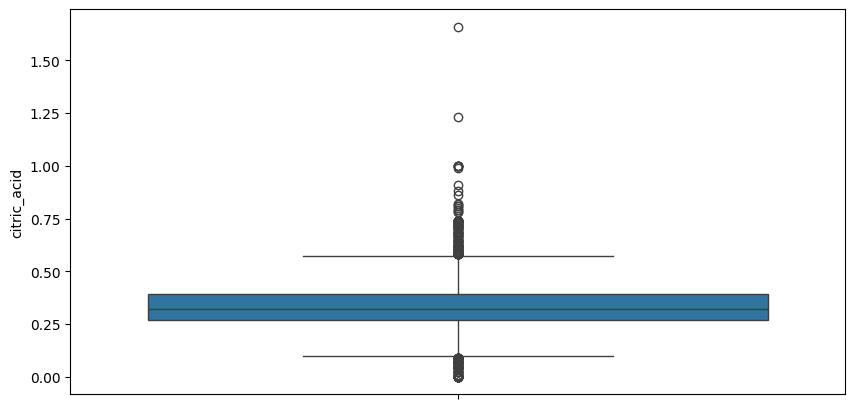

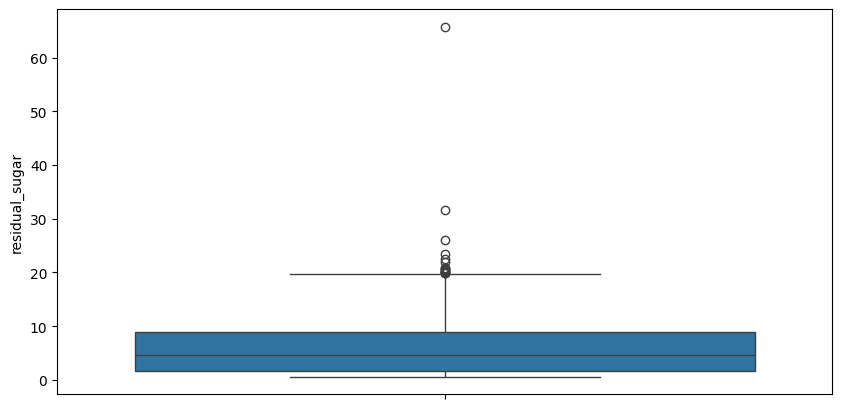

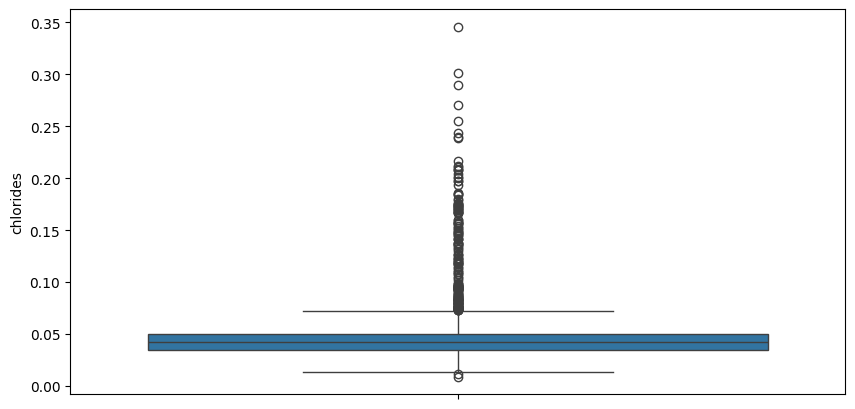

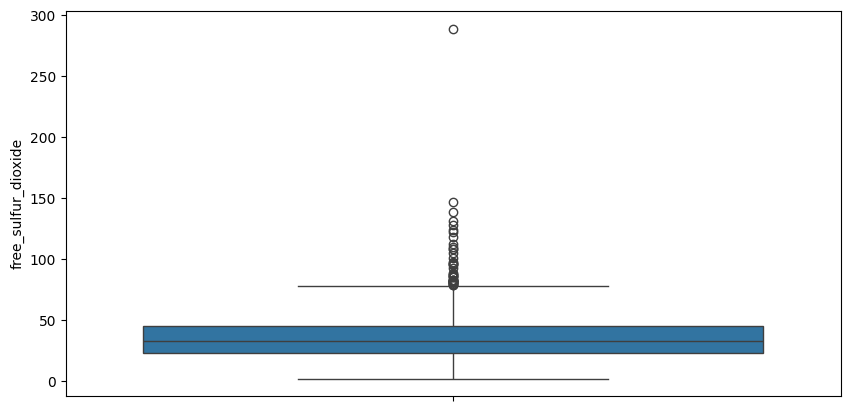

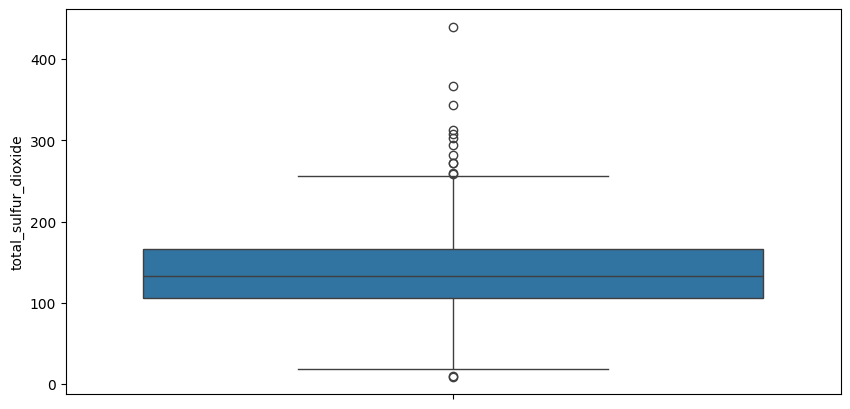

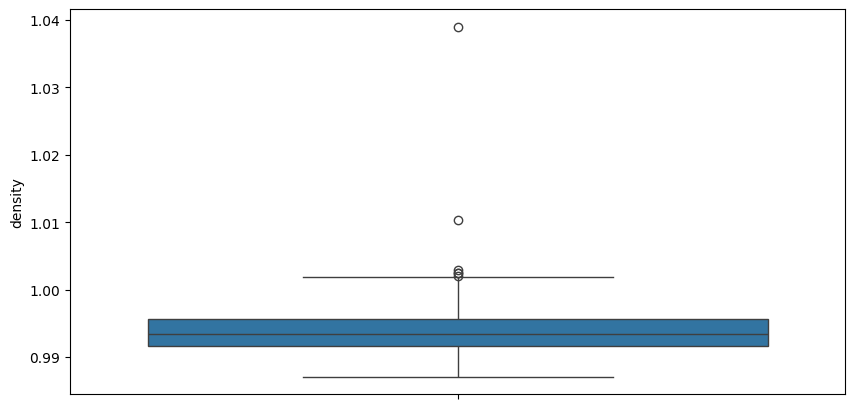

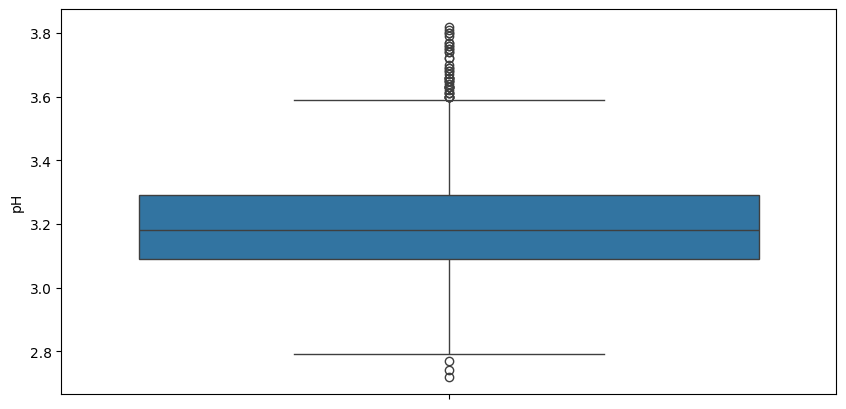

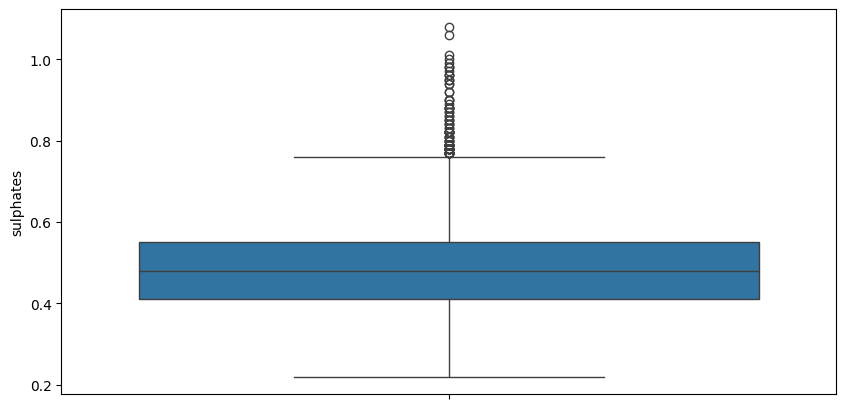

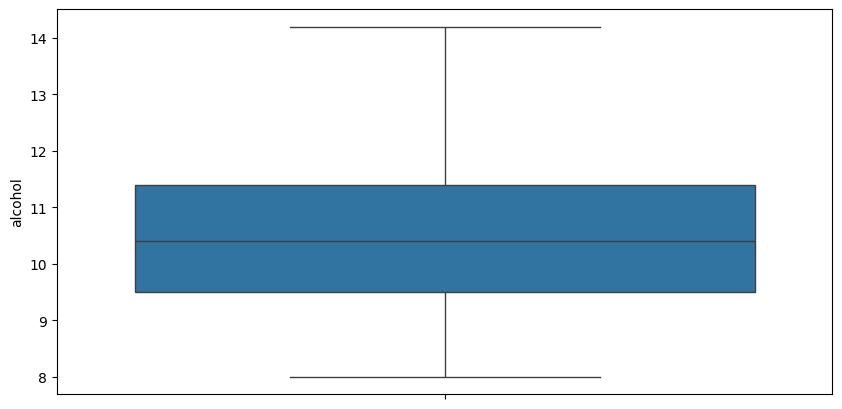

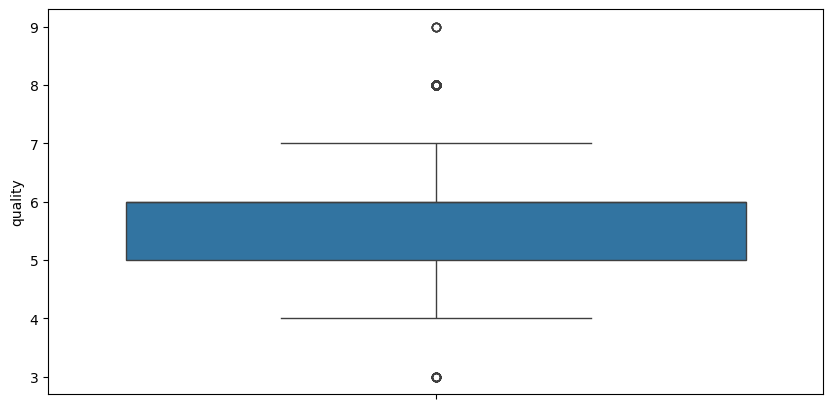

In [12]:
# now check for the outliers using the boxplot

for i in df.select_dtypes(include=np.number):
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])
    plt.show()


In [13]:
# remove the outliers using the quantile method

def whisker(col):
  q1,q3=df[col].quantile([0.25,0.75])
  iqr=q3-q1
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  return lw,uw

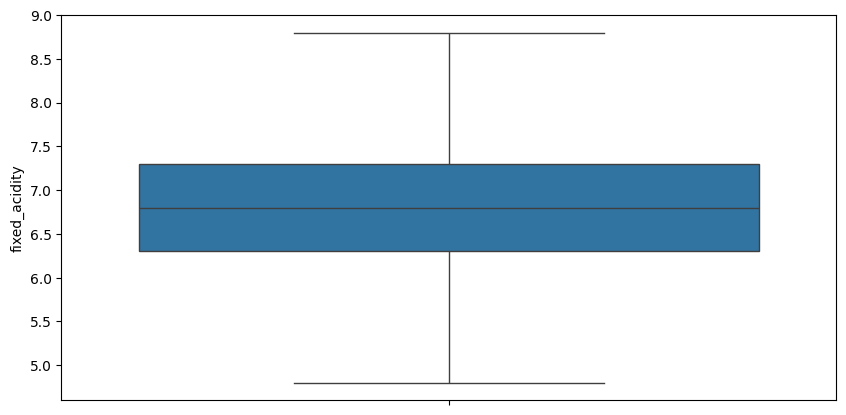

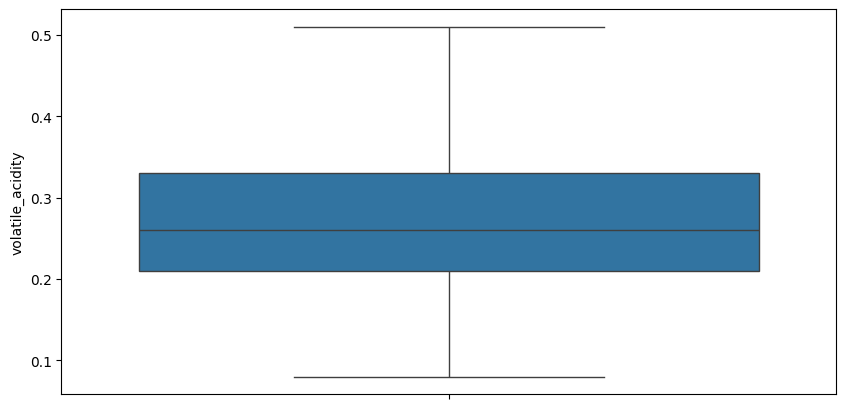

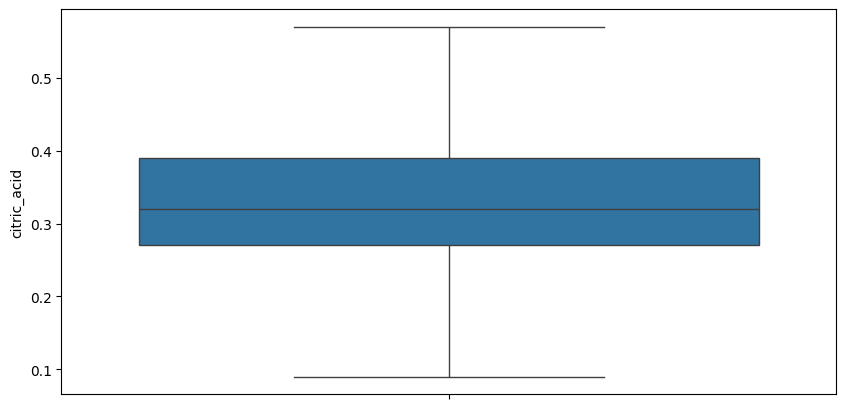

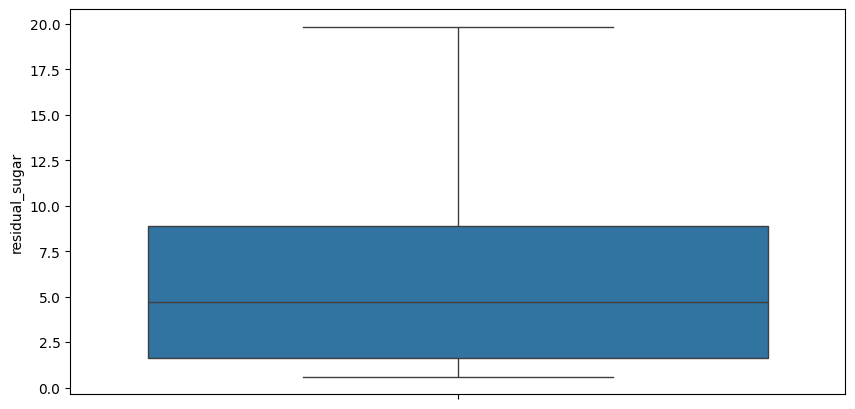

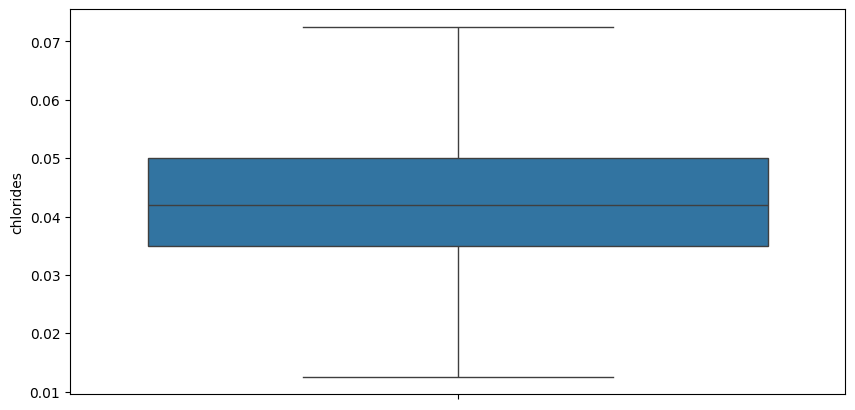

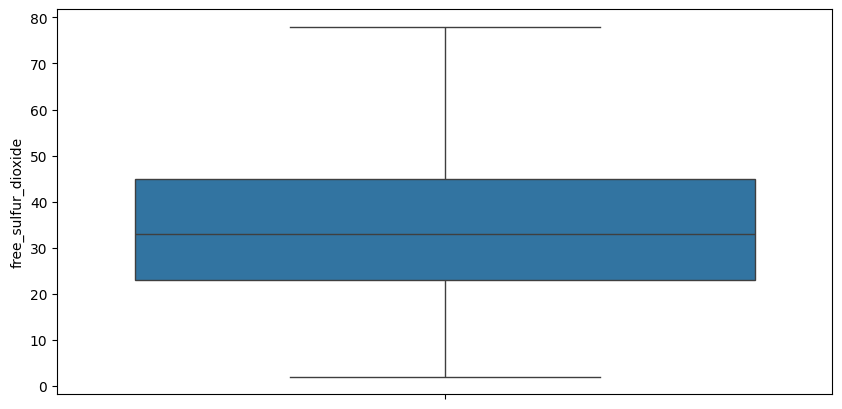

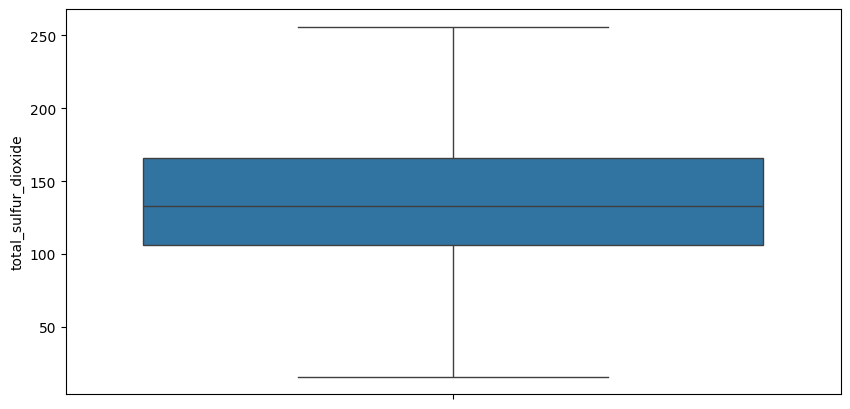

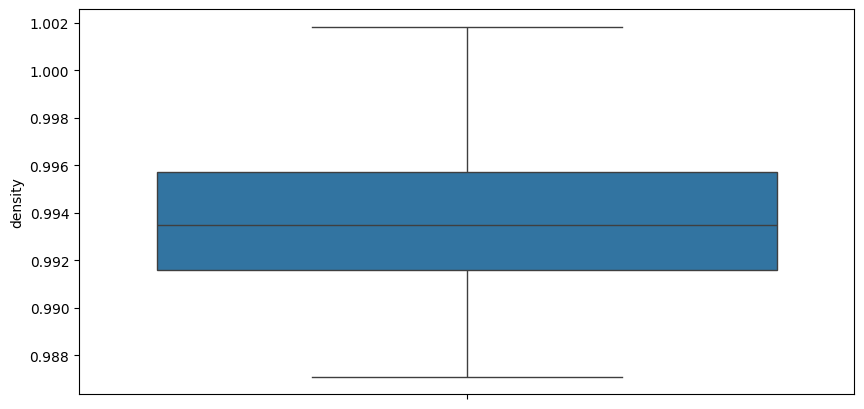

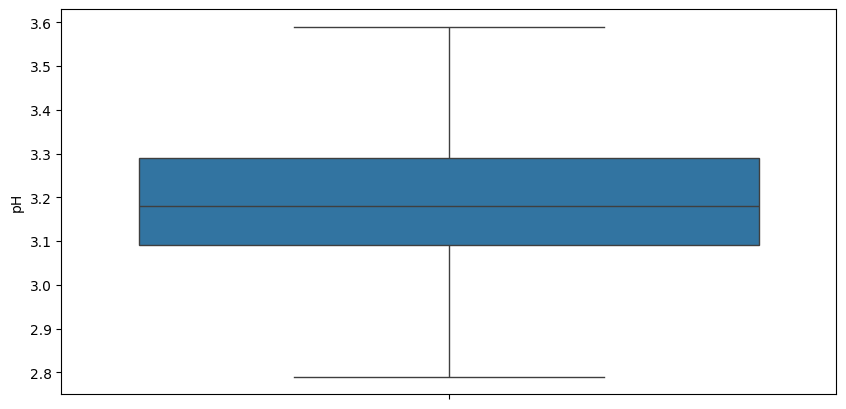

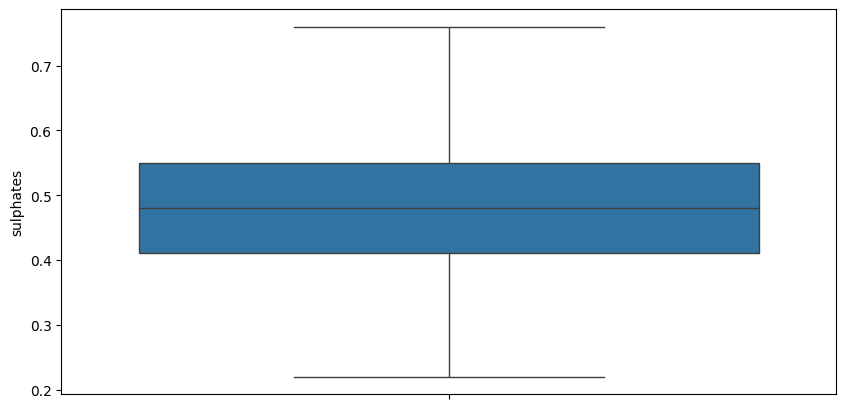

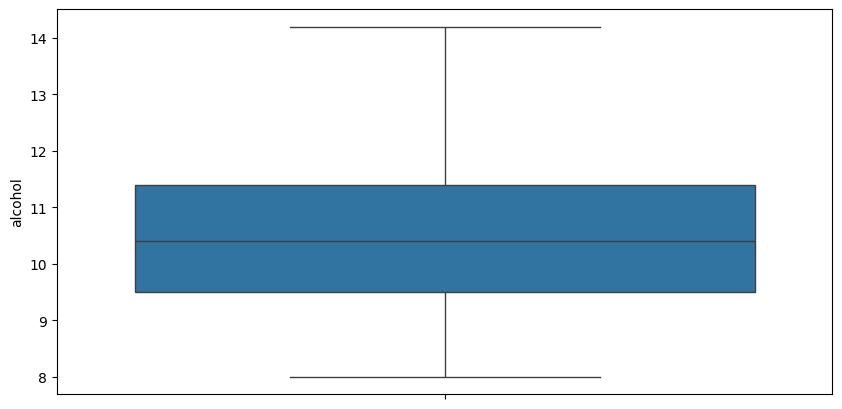

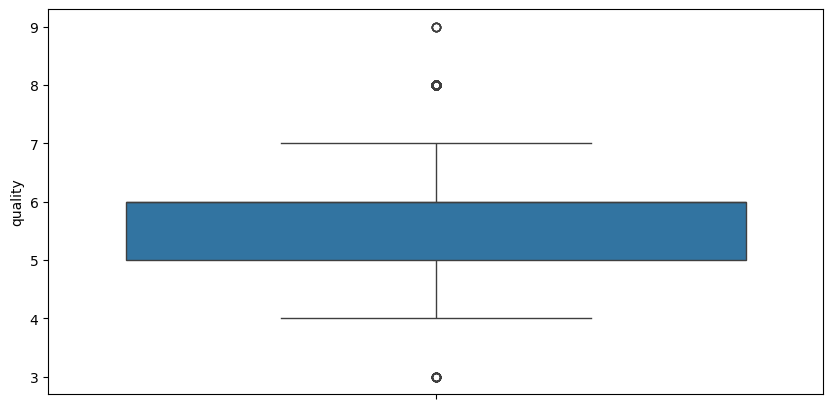

In [14]:
# remove the outliers using this function

for col in df.select_dtypes(include="number").columns:
  if col=="quality":
    pass
  else:
    lw,uw=whisker(col)
    df[col]=np.where(df[col]<lw,lw,df[col])
    df[col]=np.where(df[col]>uw,uw,df[col])


# plot the boxplot to check the outliers


for col in df.select_dtypes(include=np.number):
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.show()

-  here we removed the outliers from the dataset

# # EDA

In [15]:
# explore the stastial summary of the dataset

df.describe().T.style.background_gradient(cmap='Blues')

- form above table we conclude that the features have diffrent range of values two features free_sulfur_dioxide and total_sulfur_dioxide have higher range of values
- we have to get them in the same range in the next .

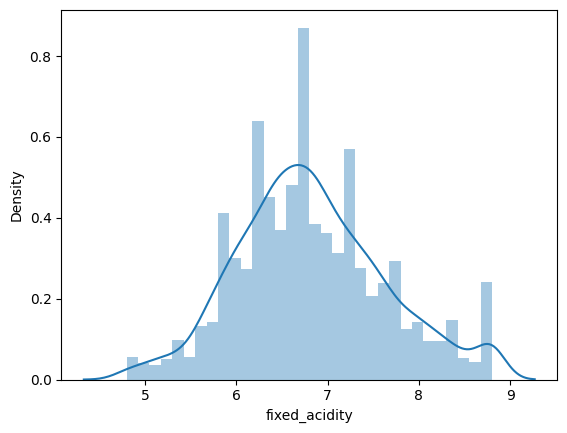

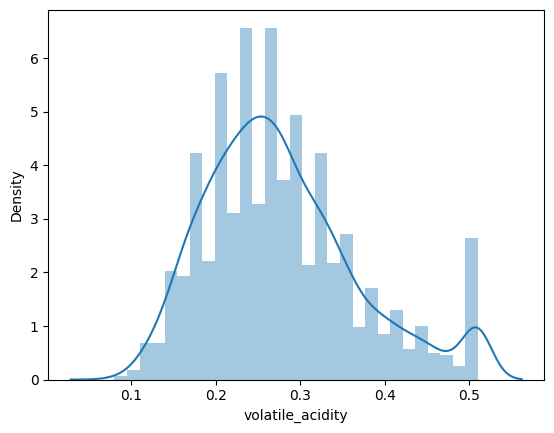

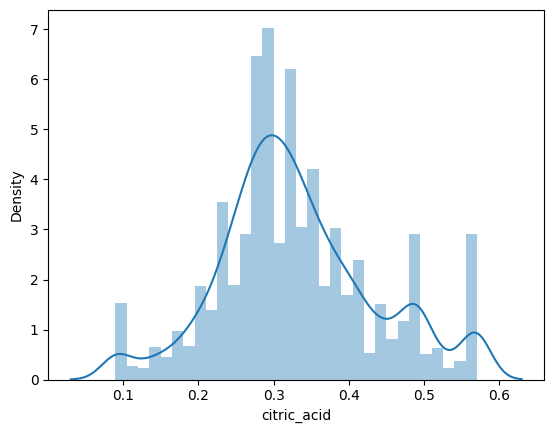

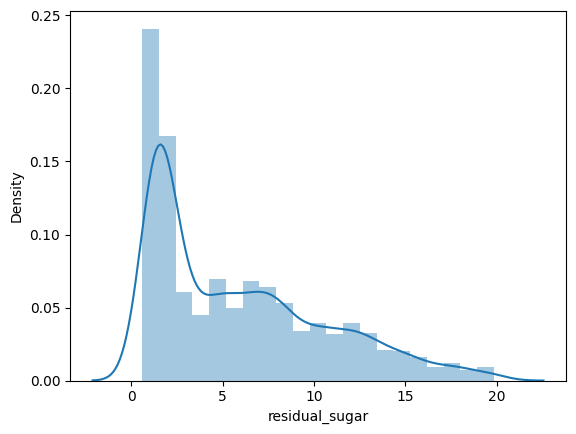

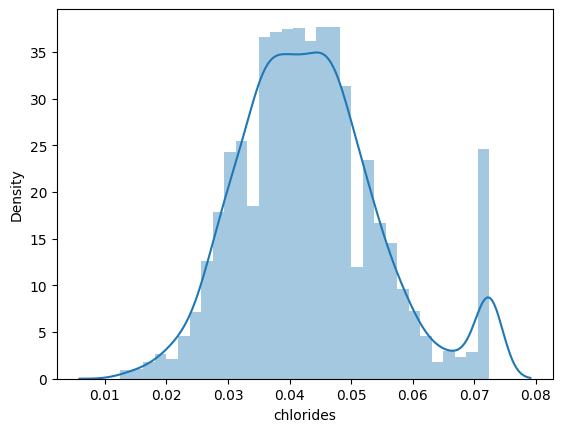

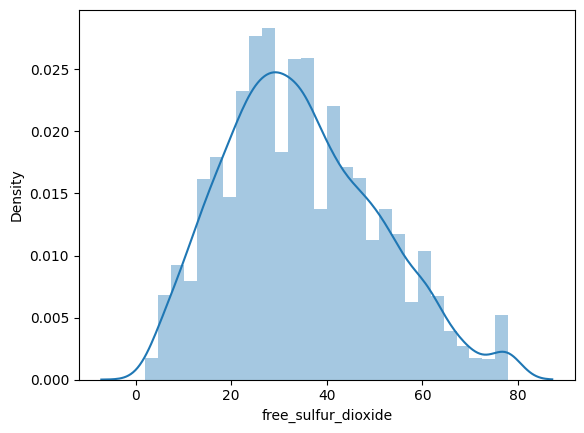

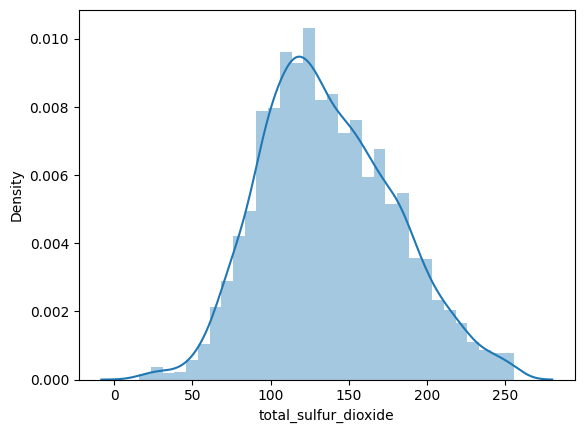

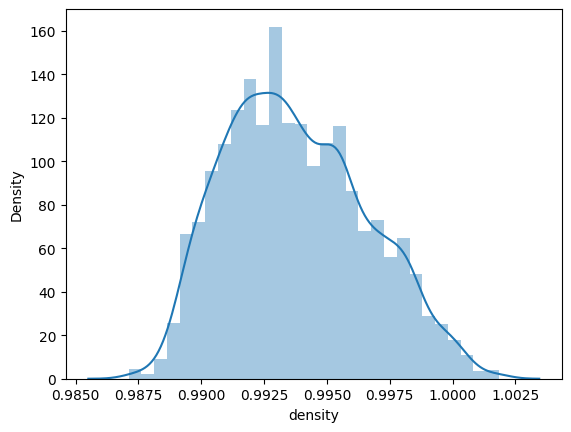

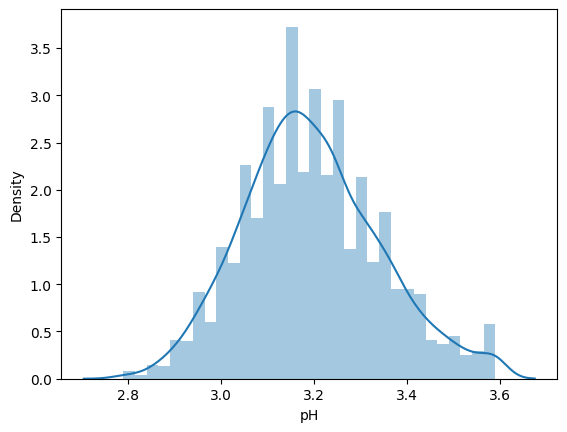

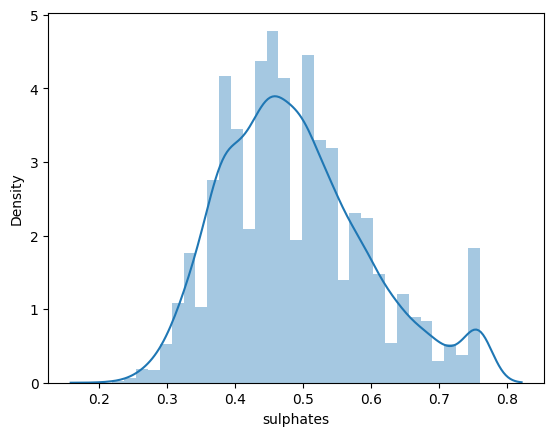

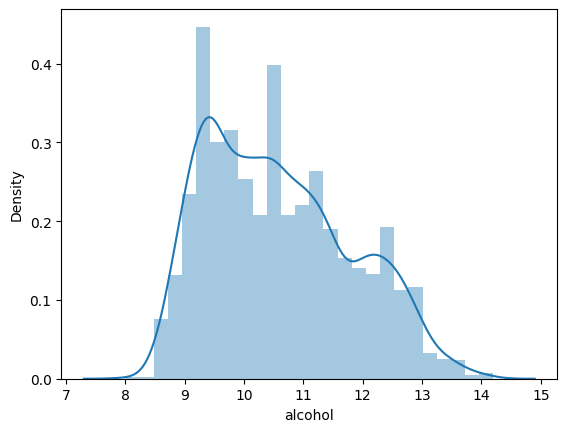

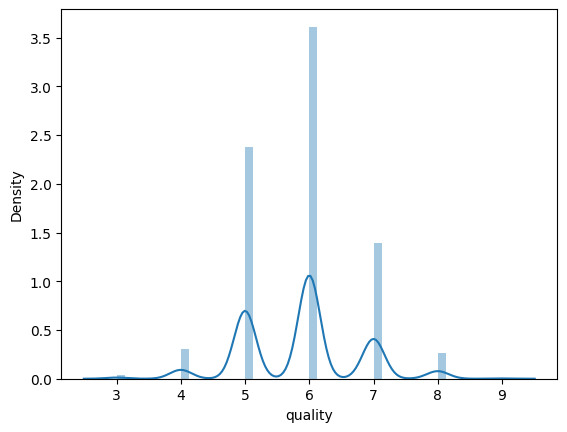

In [16]:
# now we check the distribution of the features

for col in df.select_dtypes(include="number").columns:
  sns.distplot(df[col],kde=True)
  plt.show()

- from above plots
- Except residual_sugar feature all the features are looks normal distributed and its good for model.

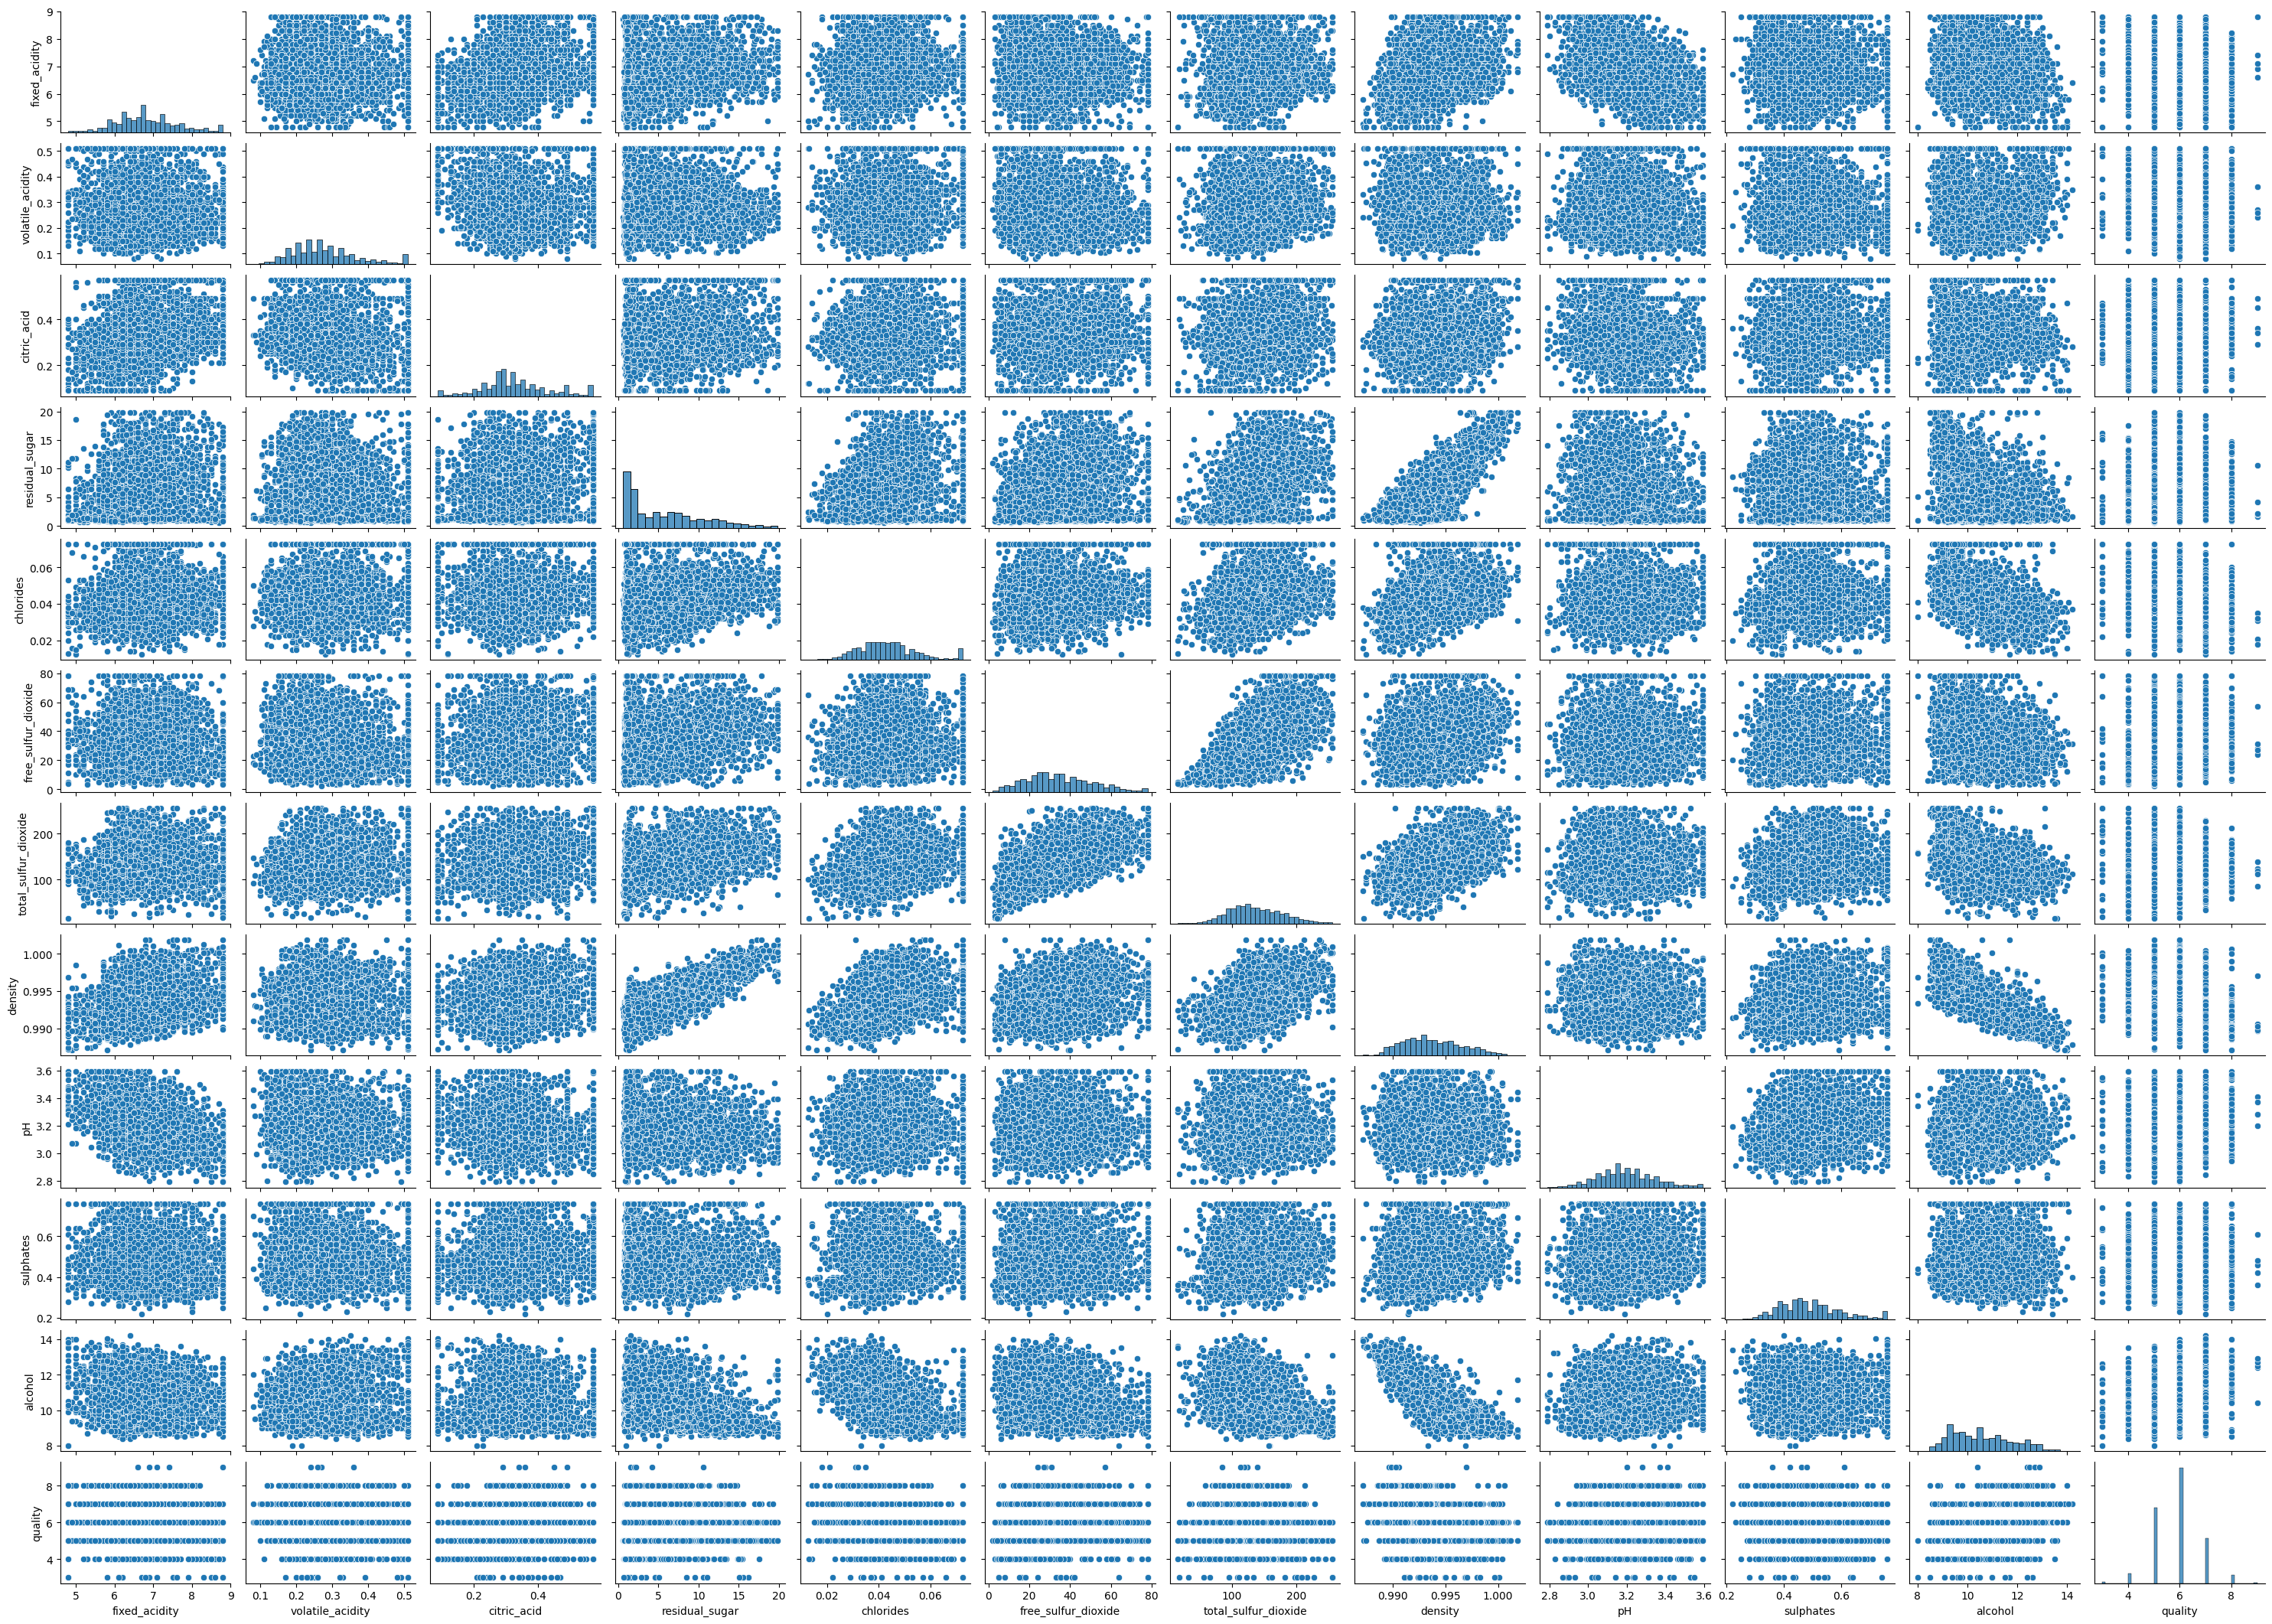

In [17]:
# now the pairplot

sns.pairplot(df,height=1.8,aspect=1.4)

- here we got the overall bivariate and the univariate analysis of the dataset

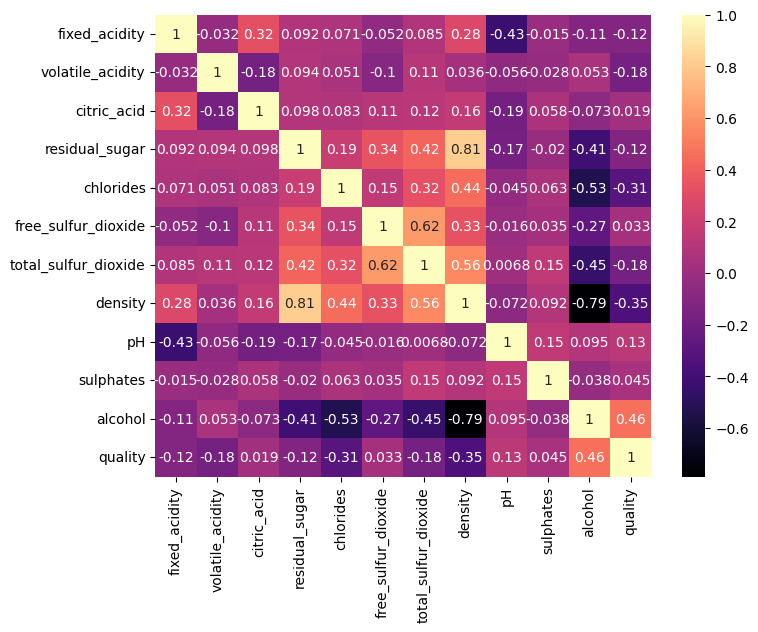

In [18]:
# now we chach the correlation between the features

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="magma")
plt.show()

- from above plot we say that tha alcohol feature the maximum correlation with the quality feature .
-  The correlation have less effect on the classification problem .

In [19]:
# check the mean of each features respect to their quality
df.groupby('quality')[df.drop("quality",axis=1).columns].mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality                                                                 
3             7.360000          0.320750     0.336000        6.392500   
4             7.074510          0.349412     0.304248        4.499346   
5             6.905830          0.298668     0.330655        6.933234   
6             6.808753          0.259723     0.333115        5.922120   
7             6.701089          0.264594     0.327025        4.523875   
8             6.619847          0.284885     0.334046        5.056489   
9             7.360000          0.298000     0.386000        4.120000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality                                                                   
3         0.045650            35.025000            153.300000  0.994884   
4         0.046820            22.441176            124.062092  0.994199   
5         0.047872            35.823830            149.914043  0.995071   
6         0.043049            35.206376            136.430649  0.993696   
7         0.037345            33.765602            122.052975  0.992059   
8         0.036385            35.251908            122.034351  0.991745   
9         0.027400            33.400000            116.000000  0.991460   

               pH  sulphates    alcohol  
quality                                  
3        3.187500   0.474500  10.345000  
4        3.183922   0.474967  10.197712  
5        3.170826   0.481966   9.864182  
6        3.194989   0.490520  10.646122  
7        3.227417   0.498621  11.515844  
8        3.235115   0.480458  11.880153  
9        3.308000   0.466000  12.180000

# Preprocessing

In [20]:
# import the recquired preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [38]:
# seperate the data from the independant features and dependant features.

X=df.drop("quality",axis=1) # independant features
y=df["quality"]   # dependant feature



In [41]:
# split the data into the train test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape :",X_train.shape,"X_test shape :",X_test.shape,"y_train shape : ",y_train.shape,"y_test shape : ",y_test.shape)

X_train shape : (3168, 11) X_test shape : (793, 11) y_train shape :  (3168,) y_test shape :  (793,)


In [46]:
# now scale the independant feature and the dependant feature

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train) # fit Standardscaler on the train set

X_test_scaled=scaler.transform(X_test) # now transform the test set



- Now the all features in the 0 mean and standard varience .
- normalized all the features .
- its essential step for model understanding fairly.